## SETUP

In [30]:
EXCLUDED_KEYS = ['outputs', 'input_lens', 'output_lens', 'ttft_description', 
                'tpot_description', 'itl_description', 'e2el_description',
                'ttfts', 'tpots', 'itls', 'errors', 'e2els']

HIT_RATIO = [0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]

## Baseline

In [31]:
import json

import pandas as pd

all_results = []

for hit_ratio in HIT_RATIO:
    with open(f"test_results/baseline_prompt400_hot_ratio{hit_ratio}_out128.json", "r") as f:
        data = json.load(f)
    results = {k: v for k, v in data.items() if k not in EXCLUDED_KEYS}
    results['hot_ratio'] = hit_ratio
    all_results.append(results)

df = pd.DataFrame(all_results)
df

,backend,base_model,tokenizer_id,num_prompts,request_rate,burstiness,max_concurrency,duration,completed,total_input_tokens,...,mean_itl_ms,median_itl_ms,std_itl_ms,p99_itl_ms,mean_e2el_ms,median_e2el_ms,std_e2el_ms,p99_e2el_ms,per_lora_metrics,hot_ratio
0,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,8.346256,200,400,...,29.825804,29.733429,2.614195,35.829451,6360.112496,8290.607251,2049.356185,8332.411057,"{'wizard-lora': {'completed': 95, 'total_input...",0.0
1,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,10.470905,200,400,...,25.100166,25.800481,3.037661,30.852570,7099.607667,6980.037974,2864.282697,10457.834746,"{'wizard-lora': {'completed': 78, 'total_input...",0.2
2,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,10.766666,200,400,...,24.944220,24.885925,2.293168,29.049858,7150.466620,6897.954715,2998.892163,10755.666733,"{'wizard-lora': {'completed': 64, 'total_input...",0.4
3,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,10.471627,200,400,...,24.897001,23.018785,3.801363,30.398874,7100.524561,7576.883052,2657.990855,10459.651819,"{'wizard-lora': {'completed': 57, 'total_input...",0.5
4,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,10.228227,200,400,...,26.624864,28.575979,5.886912,35.985597,7022.783600,7580.053467,2384.445391,10216.497725,"{'wizard-lora': {'completed': 49, 'total_input...",0.6
5,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,10.749307,200,400,...,34.005537,38.506487,9.726323,44.789052,9026.765927,10700.787334,2941.314208,10726.740586,"{'wizard-lora': {'completed': 23, 'total_input...",0.8
6,vllm,baffo32/decapoda-research-llama-7B-hf,huggyllama/llama-7b,200,inf,1.0,None,6.293717,200,400,...,44.103119,44.874461,5.147902,52.303861,6224.907043,6234.566785,32.948812,6261.589193,"{'apaca-lora': {'completed': 200, 'total_input...",1.0


In [32]:
df.columns
# overall trends

Index(['backend', 'base_model', 'tokenizer_id', 'num_prompts', 'request_rate',
       'burstiness', 'max_concurrency', 'duration', 'completed',
       'total_input_tokens', 'total_output_tokens', 'request_throughput',
       'output_throughput', 'total_token_throughput', 'mean_ttft_ms',
       'median_ttft_ms', 'std_ttft_ms', 'p99_ttft_ms', 'mean_tpot_ms',
       'median_tpot_ms', 'std_tpot_ms', 'p99_tpot_ms', 'mean_itl_ms',
       'median_itl_ms', 'std_itl_ms', 'p99_itl_ms', 'mean_e2el_ms',
       'median_e2el_ms', 'std_e2el_ms', 'p99_e2el_ms', 'per_lora_metrics',
       'hot_ratio'],
      dtype='object')

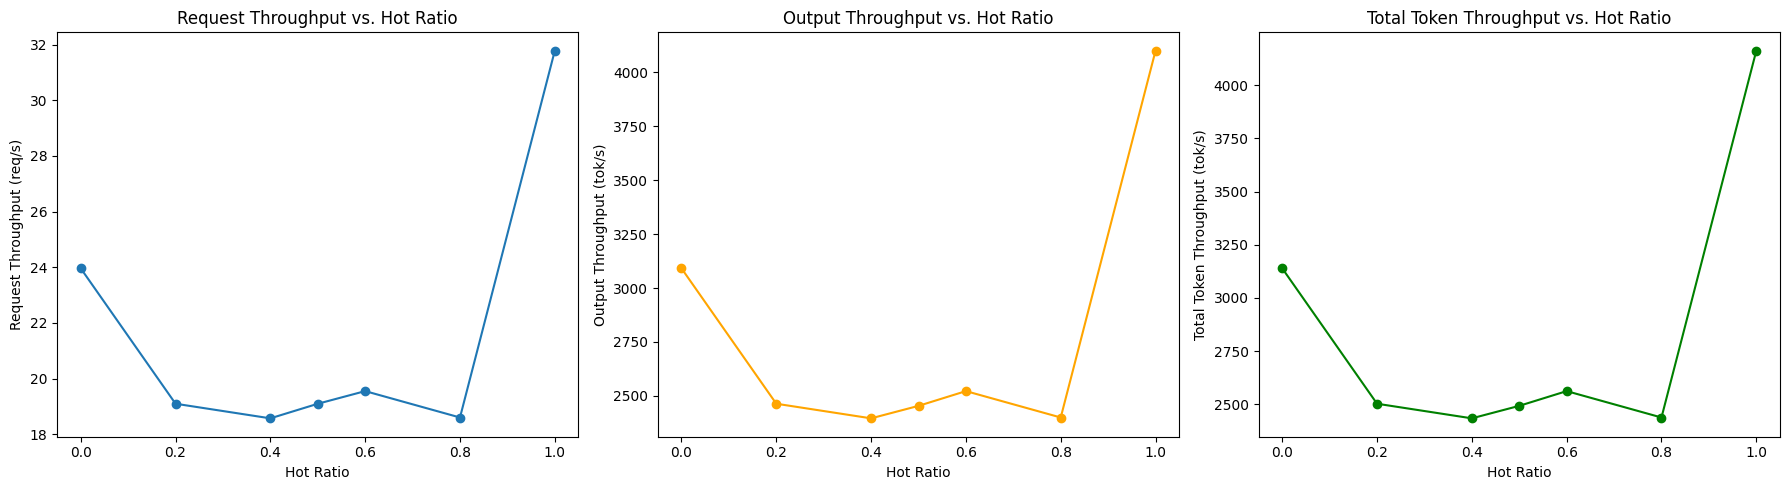

In [33]:
# ========= OVERALL THROUGHPUT =========
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot request throughput
axs[0].plot(df['hot_ratio'], df['request_throughput'], marker='o')
axs[0].set_title("Request Throughput vs. Hot Ratio")
axs[0].set_xlabel("Hot Ratio")
axs[0].set_ylabel("Request Throughput (req/s)")

# Plot output throughput
axs[1].plot(df['hot_ratio'], df['output_throughput'], marker='o', color='orange')
axs[1].set_title("Output Throughput vs. Hot Ratio")
axs[1].set_xlabel("Hot Ratio")
axs[1].set_ylabel("Output Throughput (tok/s)")

# Plot total token throughput
axs[2].plot(df['hot_ratio'], df['total_token_throughput'], marker='o', color='green')
axs[2].set_title("Total Token Throughput vs. Hot Ratio")
axs[2].set_xlabel("Hot Ratio")
axs[2].set_ylabel("Total Token Throughput (tok/s)")

plt.tight_layout()
plt.show()


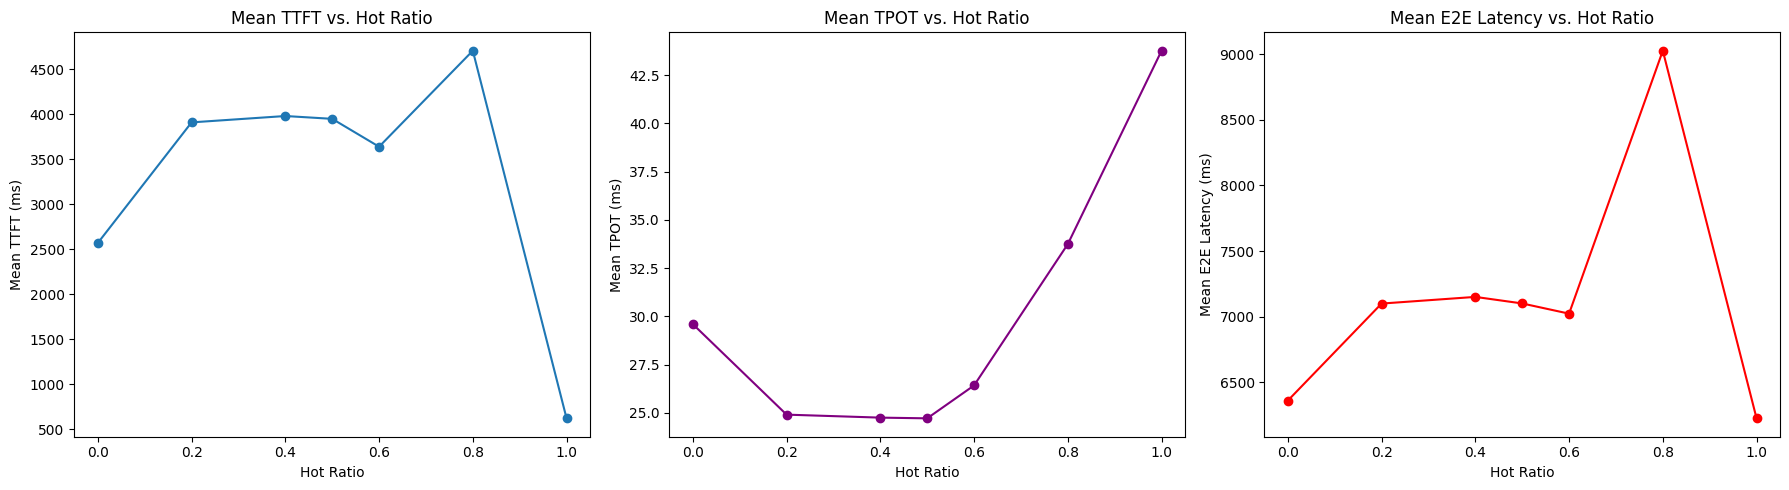

In [34]:
# ========= OVERALL LATENCY =========
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot mean_ttft_ms
axs[0].plot(df['hot_ratio'], df['mean_ttft_ms'], marker='o')
axs[0].set_title("Mean TTFT vs. Hot Ratio")
axs[0].set_xlabel("Hot Ratio")
axs[0].set_ylabel("Mean TTFT (ms)")

# Plot mean_tpot_ms
axs[1].plot(df['hot_ratio'], df['mean_tpot_ms'], marker='o', color='purple')
axs[1].set_title("Mean TPOT vs. Hot Ratio")
axs[1].set_xlabel("Hot Ratio")
axs[1].set_ylabel("Mean TPOT (ms)")

# Plot mean_e2el_ms
axs[2].plot(df['hot_ratio'], df['mean_e2el_ms'], marker='o', color='red')
axs[2].set_title("Mean E2E Latency vs. Hot Ratio")
axs[2].set_xlabel("Hot Ratio")
axs[2].set_ylabel("Mean E2E Latency (ms)")

plt.tight_layout()
plt.show()


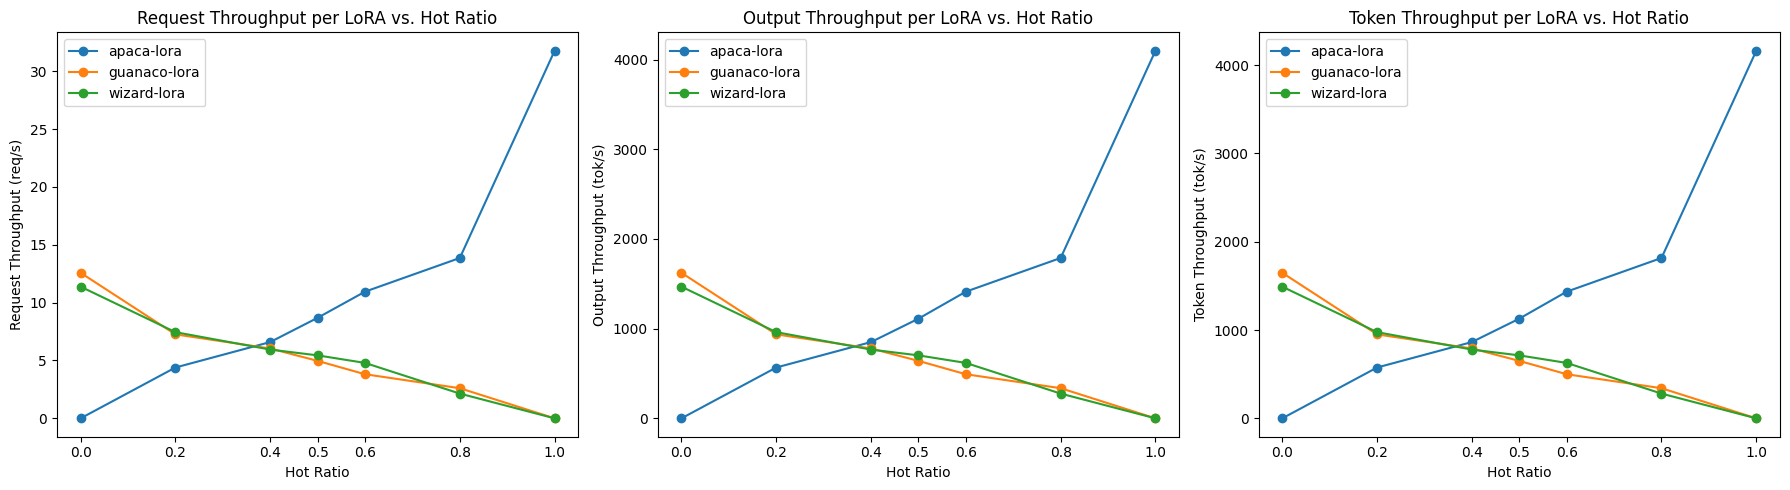

In [37]:
# ========= PER-LORA THROUGHPUT =========
import matplotlib.pyplot as plt
import ast
import numpy as np

hot_ratios = sorted(df['hot_ratio'].unique())
lora_names = set()

# Collect all possible lora_names across hot_ratios
for ratio in hot_ratios:
    row = df[df['hot_ratio'] == ratio].iloc[0]
    per_lora_metrics = row['per_lora_metrics']
    if isinstance(per_lora_metrics, str):
        per_lora_metrics = ast.literal_eval(per_lora_metrics)
    lora_names.update(per_lora_metrics.keys())

lora_names = sorted(lora_names)
colors = plt.get_cmap('tab10')
num_loras = len(lora_names)

# Gather data for each lora and metric
per_lora_data = {lora: {'request_throughput': [], 'output_throughput': [], 'token_throughput': []} for lora in lora_names}

for ratio in hot_ratios:
    row = df[df['hot_ratio'] == ratio].iloc[0]
    per_lora_metrics = row['per_lora_metrics']
    if isinstance(per_lora_metrics, str):
        per_lora_metrics = ast.literal_eval(per_lora_metrics)
    for lora in lora_names:
        m = per_lora_metrics.get(lora, {})
        per_lora_data[lora]['request_throughput'].append(m.get('request_throughput', 0))
        per_lora_data[lora]['output_throughput'].append(m.get('output_throughput', 0))
        per_lora_data[lora]['token_throughput'].append(m.get('total_token_throughput', 0))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metric_names = ["Request Throughput", "Output Throughput", "Token Throughput"]
metric_keys = ["request_throughput", "output_throughput", "token_throughput"]
ylabels = ["Request Throughput (req/s)", "Output Throughput (tok/s)", "Token Throughput (tok/s)"]

for ax, metric_name, metric_key, ylabel in zip(axes, metric_names, metric_keys, ylabels):
    for idx, lora in enumerate(lora_names):
        ax.plot(hot_ratios, per_lora_data[lora][metric_key], label=lora, marker='o', color=colors(idx))
    ax.set_title(f"{metric_name} per LoRA vs. Hot Ratio")
    ax.set_xlabel("Hot Ratio")
    ax.set_ylabel(ylabel)
    ax.set_xticks(hot_ratios)
    ax.legend()

plt.tight_layout()
plt.show()


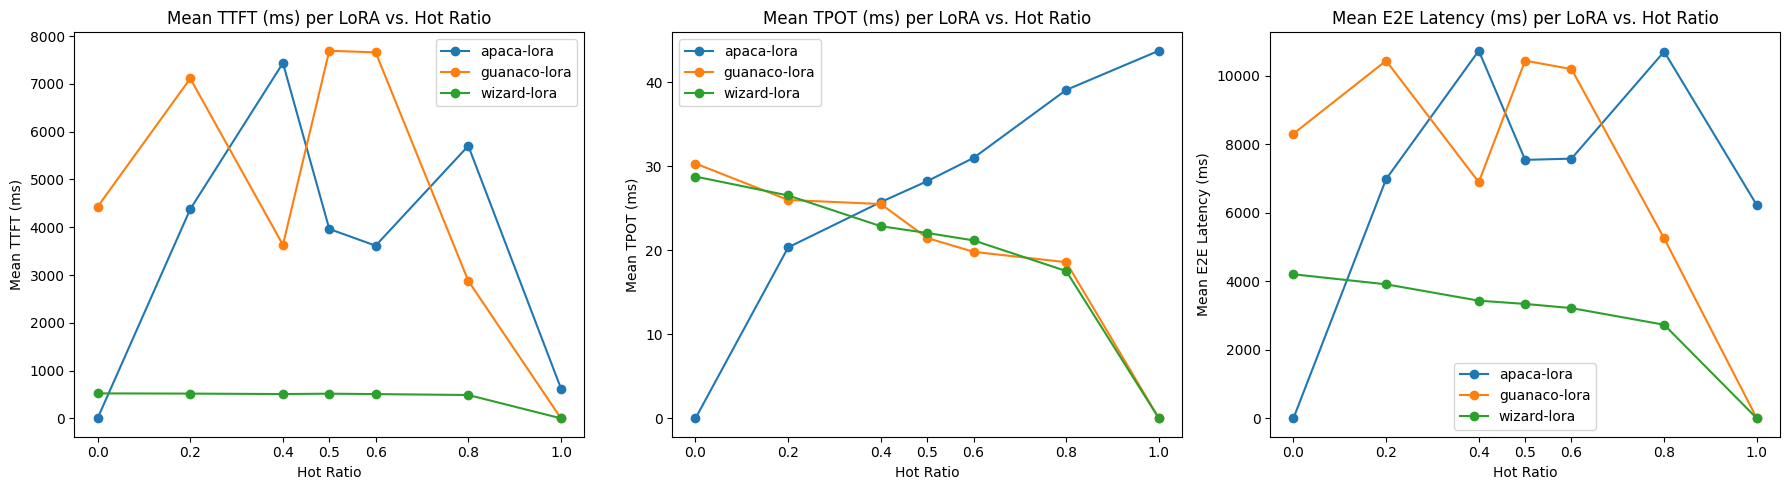

In [36]:
# ========= PER-LORA LATENCY =========
import matplotlib.pyplot as plt

# ==== 绘制每个 lora 的 mean_ttft_ms、mean_tpot_ms、mean_e2el_ms ====
lora_mean_latency = {lora: {"mean_ttft_ms": [], "mean_tpot_ms": [], "mean_e2el_ms": []} for lora in lora_names}

for ratio in hot_ratios:
    row = df[df['hot_ratio'] == ratio].iloc[0]
    per_lora_metrics = row['per_lora_metrics']
    if isinstance(per_lora_metrics, str):
        per_lora_metrics = ast.literal_eval(per_lora_metrics)
    for lora in lora_names:
        m = per_lora_metrics.get(lora, {})
        lora_mean_latency[lora]["mean_ttft_ms"].append(m.get("mean_ttft_ms", 0))
        lora_mean_latency[lora]["mean_tpot_ms"].append(m.get("mean_tpot_ms", 0))
        lora_mean_latency[lora]["mean_e2el_ms"].append(m.get("mean_e2el_ms", 0))

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
metrics = [("mean_ttft_ms", "Mean TTFT (ms)"), ("mean_tpot_ms", "Mean TPOT (ms)"), ("mean_e2el_ms", "Mean E2E Latency (ms)")]

for ax, (metric_key, metric_label) in zip(axs, metrics):
    for idx, lora in enumerate(lora_names):
        ax.plot(hot_ratios, lora_mean_latency[lora][metric_key], label=lora, marker='o', color=colors(idx))
    ax.set_title(f"{metric_label} per LoRA vs. Hot Ratio")
    ax.set_xlabel("Hot Ratio")
    ax.set_ylabel(metric_label)
    ax.set_xticks(hot_ratios)
    ax.legend()

plt.tight_layout()
plt.show()